In [1]:
import pandas as pd
import numpy as np
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Yera\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
# pip install wordcloud
# pip install sentence_transformers

In [16]:
pip install sentence_transformers

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.22.4 which is incompatible.



   ---------------------------------------- 14.7/14.7 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [2]:
df = pd.read_csv('preprocessed_amazon.csv')
df.head(2)

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,47
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,64


In [3]:
# Tokenization and Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Product Description'])

# Tokenization and Vectorization using Word2Vec
tokenized_text = [word_tokenize(text) for text in df['Product Description']]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, sg=0)
X_word2vec = [word2vec_model.wv[word] for word in tokenized_text]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Vectorize the product descriptions
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Product Description'])

# Define the KNN model
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(X)

# Define a function to find similar posts
def find_similar_posts(product_description, k=15):
    # Vectorize the input product description
    description_vector = tfidf_vectorizer.transform([product_description])
    # Find the indices of the k nearest neighbors
    _, indices = knn_model.kneighbors(description_vector)
    # Return the titles of the most similar posts
    return df.iloc[indices[0]]['Product Title']

# Example usage
input_description = "white FLOWER"
similar_posts = find_similar_posts(input_description)
print(similar_posts)


6317      Asquith & Somerset Gardenia Flower Moisturizi...
16771     Mystique Hills Organic Neem Flower Herbal Tea...
7664      Ancient Flower - Natural Vitamin C and Lavend...
16403     Ancient Flower - Natural Vitamin C and Lavend...
468       Ancient Flower - Natural Vitamin C and Lavend...
Name: Product Title, dtype: object


In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit the KNN model using TF-IDF vectors
knn_tfidf = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_tfidf.fit(X_tfidf)

# Fit the KNN model using Word2Vec vectors
X_word2vec_array = np.array([np.mean(vec, axis=0) for vec in X_word2vec])
knn_word2vec = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_word2vec.fit(X_word2vec_array)

def find_similar_posts(input_text, vectorizer, knn_model, top_k=15):
    if vectorizer == 'tfidf':
        input_vector = tfidf_vectorizer.transform([input_text])
    elif vectorizer == 'word2vec':
        words = word_tokenize(input_text)
        word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if len(word_vectors) == 0:
            return []
        input_vector = np.mean(word_vectors, axis=0).reshape(1, -1)
    
    if vectorizer == 'tfidf':
        _, indices = knn_tfidf.kneighbors(input_vector)
    elif vectorizer == 'word2vec':
        _, indices = knn_word2vec.kneighbors(input_vector)
    
    return df.iloc[indices[0]]['Product Title']

# Example usage
input_text = "purple phonecase"
similar_posts_tfidf = find_similar_posts(input_text, 'tfidf', knn_tfidf)
similar_posts_word2vec = find_similar_posts(input_text, 'word2vec', knn_word2vec)

print("Similar posts using TF-IDF:")
print(similar_posts_tfidf)
print("\nSimilar posts using Word2Vec:")
print(similar_posts_word2vec)


Similar posts using TF-IDF:
13952     Tootsie Rolls Frooties Grape Candy (360 Count...
7987                Tec Italy - Lumina Purple Conditioner 
2548      Storeway Nike Basic Purple EDT Deodorant Body...
5093      60ml , purple : MSmask Travel Bottle Squeezin...
15091     Purple : ecoLove Purple Collection Conditione...
11987     stephblack Simple Bathing Strap with Exfoliat...
10601     Avon Little Gold Dress Combo (EDP + Skin Soft...
364       Reiko Flexible Long Arms Hand Free Phone Holder 
14215     ddp acrylic nail pincher tool multi function ...
2369      Fashlady™ Green: Elecool 1 Pair Spa Gel Socks...
4471      Lili DIY Nails Rhinestone 3D Acrylic Crystal ...
6781      Ubervia Pack of 1 100g Multicolor Bath Ball H...
6407      Bombshell By Victorias Secret For Women Body ...
10195     Generic Purple, L : Yel 2 pcs Top Basketball ...
7825      Generic Pink: pro Makeup Candy Color Moisturi...
Name: Product Title, dtype: object

Similar posts using Word2Vec:
2643      Genuine Kar

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import numpy as np
from nltk.tokenize import word_tokenize
import gensim.downloader as api

# Load the GloVe model
glove_model = api.load('glove-wiki-gigaword-100')

# Fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Product Description'])

# Fit the KNN model using TF-IDF vectors
knn_tfidf = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_tfidf.fit(X_tfidf)

# Fit the KNN model using GloVe vectors
def get_glove_vector(word):
    try:
        return glove_model[word]
    except KeyError:
        return None

def get_mean_glove_vectors(words):
    vectors = [get_glove_vector(word) for word in words]
    vectors = [vec for vec in vectors if vec is not None]
    if len(vectors) == 0:
        return None
    return np.mean(vectors, axis=0).reshape(1, -1)

def get_glove_vectorized_data(X):
    vectors = [get_mean_glove_vectors(word_tokenize(str(text))) for text in X['Product Title']]
    valid_vectors = [vec for vec in vectors if vec is not None]
    return np.concatenate(valid_vectors) if valid_vectors else np.array([])

X_glove_array = get_glove_vectorized_data(df)
knn_glove = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_glove.fit(X_glove_array)

def find_similar_posts(input_text, vectorizer, knn_model, top_k=15):
    if vectorizer == 'tfidf':
        input_vector = tfidf_vectorizer.transform([input_text])
    elif vectorizer == 'glove':
        input_vector = get_mean_glove_vectors(word_tokenize(input_text))
        if input_vector is None:
            return []
    
    if vectorizer == 'tfidf':
        _, indices = knn_tfidf.kneighbors(input_vector)
    elif vectorizer == 'glove':
        _, indices = knn_glove.kneighbors(input_vector)
    
    return df.iloc[indices[0]]['Product Title']

# Example usage
input_text = "purple phonecase"
similar_posts_tfidf = find_similar_posts(input_text, 'tfidf', knn_tfidf)
similar_posts_glove = find_similar_posts(input_text, 'glove', knn_glove)

print("Similar posts using TF-IDF:")
print(similar_posts_tfidf)
print("\nSimilar posts using GloVe:")
print(similar_posts_glove)


Similar posts using TF-IDF:
13952     Tootsie Rolls Frooties Grape Candy (360 Count...
7987                Tec Italy - Lumina Purple Conditioner 
2548      Storeway Nike Basic Purple EDT Deodorant Body...
5093      60ml , purple : MSmask Travel Bottle Squeezin...
15091     Purple : ecoLove Purple Collection Conditione...
11987     stephblack Simple Bathing Strap with Exfoliat...
10601     Avon Little Gold Dress Combo (EDP + Skin Soft...
364       Reiko Flexible Long Arms Hand Free Phone Holder 
14215     ddp acrylic nail pincher tool multi function ...
2369      Fashlady™ Green: Elecool 1 Pair Spa Gel Socks...
4471      Lili DIY Nails Rhinestone 3D Acrylic Crystal ...
6781      Ubervia Pack of 1 100g Multicolor Bath Ball H...
6407      Bombshell By Victorias Secret For Women Body ...
10195     Generic Purple, L : Yel 2 pcs Top Basketball ...
7825      Generic Pink: pro Makeup Candy Color Moisturi...
Name: Product Title, dtype: object

Similar posts using GloVe:
13930     Suave Invis Sl

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import numpy as np
from nltk.tokenize import word_tokenize
import gensim.downloader as api

# Load the GloVe model
glove_model = api.load('glove-wiki-gigaword-100')

# Vectorize the product descriptions
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Product Description'])

# Fit the KNN model using TF-IDF vectors
knn_tfidf = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_tfidf.fit(X_tfidf)

# Fit the KNN model using Word2Vec vectors
X_word2vec_array = np.array([np.mean(vec, axis=0) for vec in X_word2vec])
knn_word2vec = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_word2vec.fit(X_word2vec_array)

# Fit the KNN model using GloVe vectors
def get_glove_vector(word):
    try:
        return glove_model[word]
    except KeyError:
        return None

def get_mean_glove_vectors(words):
    vectors = [get_glove_vector(word) for word in words]
    vectors = [vec for vec in vectors if vec is not None]
    if len(vectors) == 0:
        return None
    return np.mean(vectors, axis=0).reshape(1, -1)

def get_glove_vectorized_data(X):
    vectors = [get_mean_glove_vectors(word_tokenize(str(text))) for text in X['Product Title']]
    valid_vectors = [vec for vec in vectors if vec is not None]
    return np.concatenate(valid_vectors) if valid_vectors else np.array([])

X_glove_array = get_glove_vectorized_data(df)
knn_glove = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_glove.fit(X_glove_array)

def find_similar_posts(input_text, vectorizer, knn_model, top_k=15):
    if vectorizer == 'tfidf':
        input_vector = tfidf_vectorizer.transform([input_text])
    elif vectorizer == 'word2vec':
        words = word_tokenize(input_text)
        word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if len(word_vectors) == 0:
            return []
        input_vector = np.mean(word_vectors, axis=0).reshape(1, -1)
    elif vectorizer == 'glove':
        input_vector = get_mean_glove_vectors(word_tokenize(input_text))
        if input_vector is None:
            return []

    if vectorizer == 'tfidf':
        _, indices = knn_tfidf.kneighbors(input_vector)
    elif vectorizer == 'word2vec':
        _, indices = knn_word2vec.kneighbors(input_vector)
    elif vectorizer == 'glove':
        _, indices = knn_glove.kneighbors(input_vector)
    
    similar_indices = indices.flatten()[:top_k]
    similar_posts = [df.iloc[idx]['Product Title'] for idx in similar_indices]
    
    return similar_posts

# Example usage
input_text = "purple phonecase"
similar_posts_tfidf = find_similar_posts(input_text, 'tfidf', knn_tfidf)
similar_posts_word2vec = find_similar_posts(input_text, 'word2vec', knn_word2vec)
similar_posts_glove = find_similar_posts(input_text, 'glove', knn_glove)

print("Similar posts using TF-IDF:")
for post in similar_posts_tfidf:
    print(post)

print("\nSimilar posts using Word2Vec:")
for post in similar_posts_word2vec:
    print(post)

print("\nSimilar posts using GloVe:")
for post in similar_posts_glove:
    print(post)


Similar posts using TF-IDF:
 Tootsie Rolls Frooties Grape Candy (360 Count), 38.8Oz 
 Tec Italy - Lumina Purple Conditioner 
 Storeway Nike Basic Purple EDT Deodorant Body Spray for Women 200ml 
 60ml , purple : MSmask Travel Bottle Squeezing Bath Lotion Cosmetic Skincare Refillable None Leaking 
 Purple : ecoLove Purple Collection Conditioner for colored and very dry hair - Blueberry, Grape & Lavender. 100% VEGAN (17.6 Oz) 
 stephblack Simple Bathing Strap with Exfoliating Bathing Ball Back Sponge Nylon Brush Scrubbing Back Wipe(None Yellow) 
 Avon Little Gold Dress Combo (EDP + Skin Softener) 
 Reiko Flexible Long Arms Hand Free Phone Holder 
 ddp acrylic nail pincher tool multi function cuticle pusher tweezer magic wand purple 
 Fashlady™ Green: Elecool 1 Pair Spa Gel Socks Moisturize Soften Repair Cracked Skin Gel Socks Skin Moisturizing Gel Spa Socks Manicure Tools 
 Lili DIY Nails Rhinestone 3D Acrylic Crystal Glitter jewelry Nail Art Decorations Makeup Tools: 036 
 Ubervia Pack 

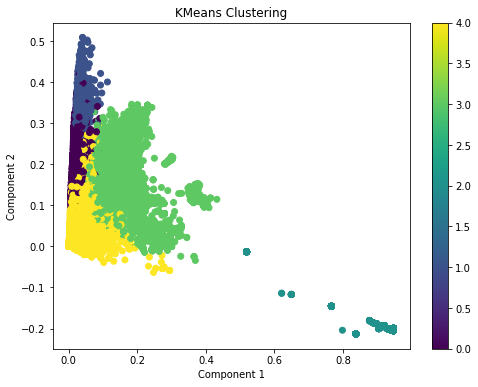

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_tfidf)  # Use X_glove_array for GloVe vectors

# Reduce dimensions for visualization using TruncatedSVD (similar to PCA but for sparse data)
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)  # Use X_glove_array for GloVe vectors

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()


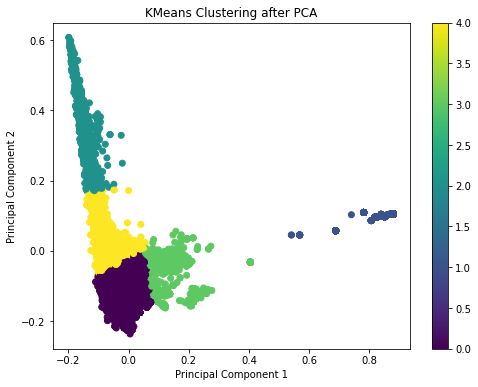

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
import numpy as np

# Assuming you have already computed X_tfidf or X_glove_array

# Reduce dimensions using IncrementalPCA
n_components = 2
batch_size = 1000
n_batches = int(np.ceil(X_tfidf.shape[0] / batch_size))

ipca = IncrementalPCA(n_components=n_components)
for i in range(n_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    X_batch = X_tfidf[start:end]
    ipca.partial_fit(X_batch.toarray())

X_pca = ipca.transform(X_tfidf.toarray())  # Use X_glove_array for GloVe vectors

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


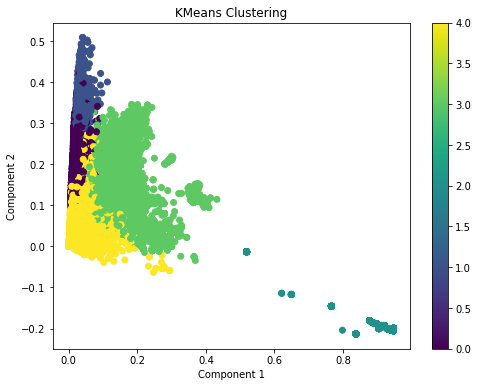

Similar posts using TF-IDF:
13952     Tootsie Rolls Frooties Grape Candy (360 Count...
7987                Tec Italy - Lumina Purple Conditioner 
2548      Storeway Nike Basic Purple EDT Deodorant Body...
5093      60ml , purple : MSmask Travel Bottle Squeezin...
15091     Purple : ecoLove Purple Collection Conditione...
11987     stephblack Simple Bathing Strap with Exfoliat...
10601     Avon Little Gold Dress Combo (EDP + Skin Soft...
364       Reiko Flexible Long Arms Hand Free Phone Holder 
14215     ddp acrylic nail pincher tool multi function ...
2369      Fashlady™ Green: Elecool 1 Pair Spa Gel Socks...
4471      Lili DIY Nails Rhinestone 3D Acrylic Crystal ...
6781      Ubervia Pack of 1 100g Multicolor Bath Ball H...
6407      Bombshell By Victorias Secret For Women Body ...
10195     Generic Purple, L : Yel 2 pcs Top Basketball ...
7825      Generic Pink: pro Makeup Candy Color Moisturi...
Name: Product Title, dtype: object

Similar posts using GloVe:
1672      Sinland Makeup

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from nltk.tokenize import word_tokenize
import gensim.downloader as api
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Load the preprocessed data
df = pd.read_csv('preprocessed_amazon.csv')

# Vectorize the product descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Product Description'])

# Vectorize the product descriptions using GloVe
glove_model = api.load('glove-wiki-gigaword-100')

def get_glove_vector(word):
    try:
        return glove_model[word]
    except KeyError:
        return None

def get_mean_glove_vectors(words):
    vectors = [get_glove_vector(word) for word in words]
    vectors = [vec for vec in vectors if vec is not None]
    if len(vectors) == 0:
        return np.zeros((1, 100))  # Assuming GloVe vectors are of length 100
    return np.mean(vectors, axis=0).reshape(1, -1)

X_glove = np.concatenate([get_mean_glove_vectors(word_tokenize(str(text))) for text in df['Product Description']])
knn_glove = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_glove.fit(X_glove)

# Perform KMeans++ clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_tfidf)

# Visualize the clusters
svd = TruncatedSVD(n_components=3, random_state=340)
X_svd = svd.fit_transform(X_tfidf)
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

# Define a function to find similar posts using TF-IDF
def find_similar_posts_tfidf(input_text, top_k=15):
    input_vector = tfidf_vectorizer.transform([input_text])
    _, indices = knn_tfidf.kneighbors(input_vector)
    return df.iloc[indices[0]]['Product Title']

# Define a function to find similar posts using GloVe
def find_similar_posts_glove(input_text, top_k=15):
    input_vector = get_mean_glove_vectors(word_tokenize(input_text))
    if input_vector is None:
        return []
    _, indices = knn_glove.kneighbors(input_vector)
    return df.iloc[indices[0]]['Product Title']

# Example usage
input_text = "purple phonecase"
similar_posts_tfidf = find_similar_posts_tfidf(input_text)
similar_posts_glove = find_similar_posts_glove(input_text)

print("Similar posts using TF-IDF:")
print(similar_posts_tfidf)
print("\nSimilar posts using GloVe:")
print(similar_posts_glove)

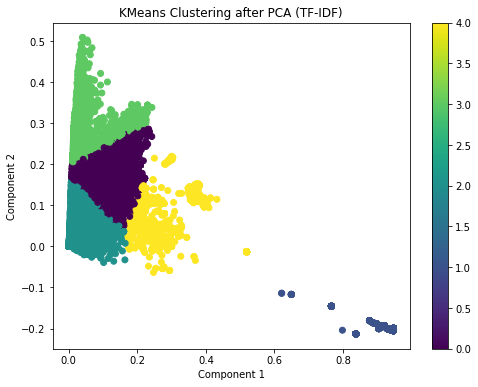

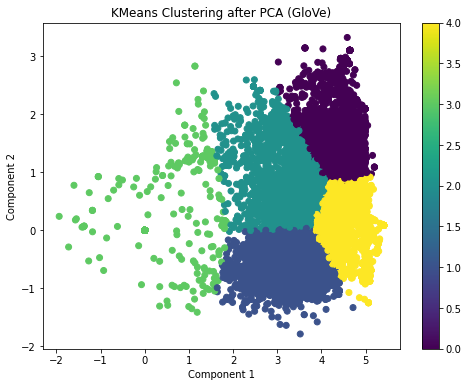

ValueError: X has 31356 features, but TruncatedSVD is expecting 100 features as input.

In [11]:
# Perform PCA on TF-IDF vectors
pca = TruncatedSVD(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf)

# Perform PCA on GloVe vectors
X_glove_pca = pca.fit_transform(X_glove)

# Perform KMeans clustering on PCA-transformed TF-IDF vectors
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(X_pca)

# Perform KMeans clustering on PCA-transformed GloVe vectors
kmeans_glove_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_glove_pca.fit(X_glove_pca)

# Visualize the clusters for PCA-transformed TF-IDF vectors
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('KMeans Clustering after PCA (TF-IDF)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

# Visualize the clusters for PCA-transformed GloVe vectors
plt.figure(figsize=(8, 6))
plt.scatter(X_glove_pca[:, 0], X_glove_pca[:, 1], c=kmeans_glove_pca.labels_, cmap='viridis')
plt.title('KMeans Clustering after PCA (GloVe)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

# Define a function to find similar posts using PCA-transformed TF-IDF vectors
def find_similar_posts_tfidf_pca(input_text, top_k=15):
    input_vector = tfidf_vectorizer.transform([input_text])
    input_pca = pca.transform(input_vector)
    _, indices = knn_tfidf.kneighbors(input_pca)
    return df.iloc[indices[0]]['Product Title']

# Define a function to find similar posts using PCA-transformed GloVe vectors
def find_similar_posts_glove_pca(input_text, top_k=15):
    input_vector = get_mean_glove_vectors(word_tokenize(input_text))
    if input_vector is None:
        return []
    input_pca = pca.transform(input_vector)
    _, indices = knn_glove.kneighbors(input_pca)
    return df.iloc[indices[0]]['Product Title']

# Example usage for PCA-transformed TF-IDF vectors
input_text = "purple phonecase"
similar_posts_tfidf_pca = find_similar_posts_tfidf_pca(input_text)
print("Similar posts using TF-IDF after PCA:")
print(similar_posts_tfidf_pca)

# Example usage for PCA-transformed GloVe vectors
similar_posts_glove_pca = find_similar_posts_glove_pca(input_text)
print("\nSimilar posts using GloVe after PCA:")
print(similar_posts_glove_pca)

In [ ]:
# pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


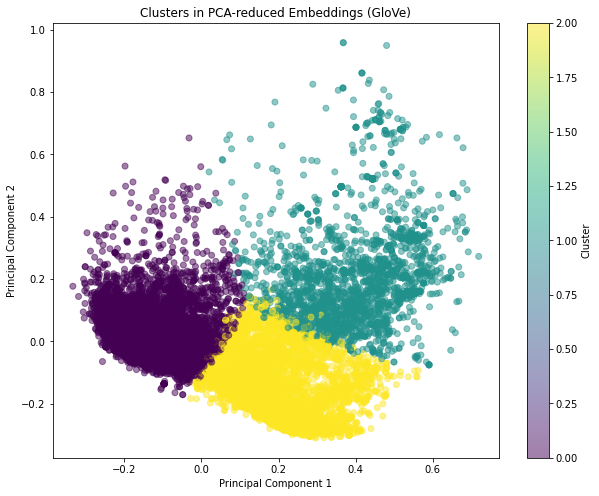

NameError: name 'defaultdict' is not defined

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Load GloVe embeddings
glove_model = api.load('glove-wiki-gigaword-100')

# Vectorize product descriptions using GloVe embeddings
def get_mean_glove_vector(text):
    words = word_tokenize(text)
    vectors = [glove_model[word] for word in words if word in glove_model]
    return np.mean(vectors, axis=0) if vectors else None

X_glove = df['Product Description'].apply(get_mean_glove_vector)
X_glove = np.vstack(X_glove.dropna())

# Normalize embeddings
normalized_embeddings = X_glove / np.linalg.norm(X_glove, axis=1, keepdims=True)

# Clustering
kmeans_glove = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_glove = kmeans_glove.fit_predict(normalized_embeddings)

# PCA for visualization
pca_glove = PCA(n_components=3)
compressed_embeddings_glove = pca_glove.fit_transform(normalized_embeddings)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(compressed_embeddings_glove[:, 0], compressed_embeddings_glove[:, 1], c=clusters_glove, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Clusters in PCA-reduced Embeddings (GloVe)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

c:\Users\Yera\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Yera\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


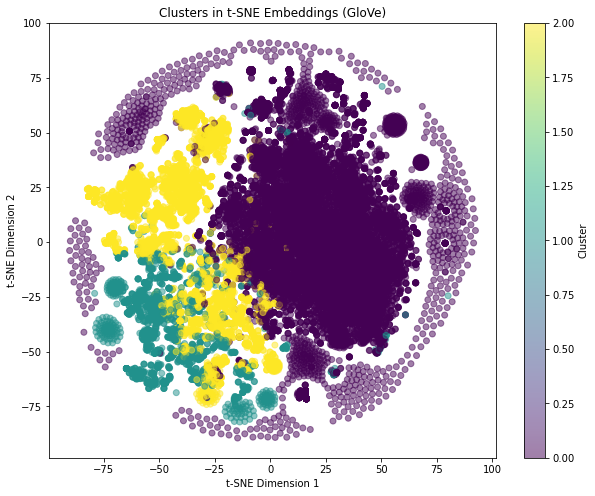

NameError: name 'defaultdict' is not defined

In [13]:
from sklearn.manifold import TSNE

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
embedded_embeddings_glove = tsne.fit_transform(normalized_embeddings)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(embedded_embeddings_glove[:, 0], embedded_embeddings_glove[:, 1], c=clusters_glove, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Clusters in t-SNE Embeddings (GloVe)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

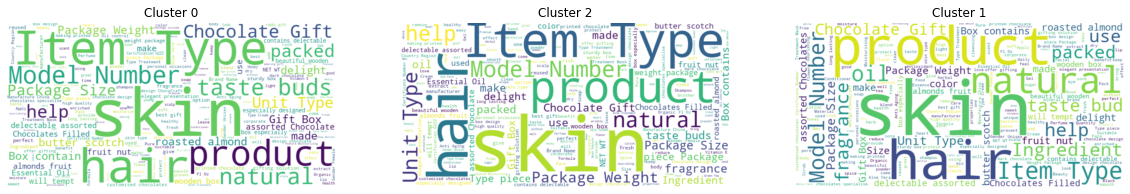

In [14]:
from collections import defaultdict

# Word Clouds
cluster_texts_glove = defaultdict(str)
for text, label in zip(df['Product Description'], clusters_glove):
    cluster_texts_glove[label] += " " + text

plt.figure(figsize=(20, 10))
for i, (label, text) in enumerate(cluster_texts_glove.items(), 1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(1, len(cluster_texts_glove), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label}')
    plt.axis("off")
plt.show()

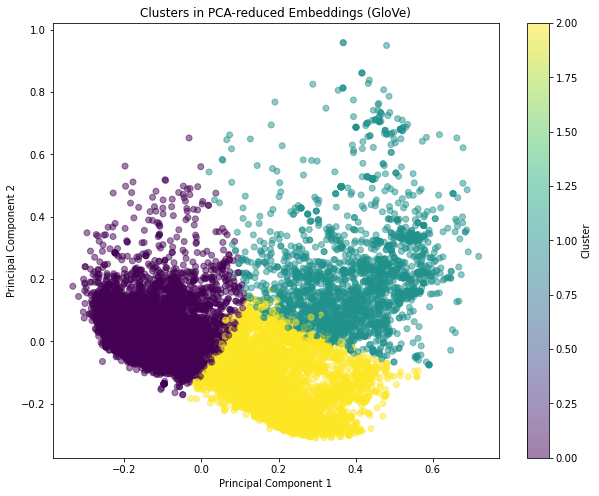

In [ ]:
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Load GloVe embeddings
glove_model = api.load('glove-wiki-gigaword-100')

# Vectorize product descriptions using GloVe embeddings
def get_mean_glove_vector(text):
    words = word_tokenize(text)
    vectors = [glove_model[word] for word in words if word in glove_model]
    return np.mean(vectors, axis=0) if vectors else None

X_glove = df['Product Description'].apply(get_mean_glove_vector)
X_glove = np.vstack(X_glove.dropna())

# Normalize embeddings
normalized_embeddings = X_glove / np.linalg.norm(X_glove, axis=1, keepdims=True)

# Clustering
kmeans_glove = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_glove = kmeans_glove.fit_predict(normalized_embeddings)

# PCA for visualization
pca_glove = PCA(n_components=3)
compressed_embeddings_glove = pca_glove.fit_transform(normalized_embeddings)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(compressed_embeddings_glove[:, 0], compressed_embeddings_glove[:, 1], c=clusters_glove, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Clusters in PCA-reduced Embeddings (GloVe)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cluster_texts = defaultdict(str)

for text, label in zip(df['Product Title'], clusters_glove):
    cluster_texts[label] += " " + text

plt.figure(figsize=(20, 10))

for i, (label, text) in enumerate(cluster_texts.items(), 1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts[label])  # Use cluster_texts[label] to get the combined text for the cluster

    plt.subplot(1, len(cluster_texts), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label}')
    plt.axis("off")

plt.show()


ValueError: Only supported for TrueType fonts

<Figure size 1440x720 with 0 Axes>

In [ ]:
pip install --upgrade pip 

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade Pillow

   ---------------------------------------- 2.5/2.5 MB 4.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1



In [ ]:
pip install libfreetype6

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement libfreetype6 (from versions: none)
ERROR: No matching distribution found for libfreetype6


In [ ]:
pip install wordcloud==1.8.0

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Clouds
cluster_texts_glove = defaultdict(str)
for text, label in zip(df['Product Title'], clusters_glove):
    cluster_texts_glove[label] += " " + text

plt.figure(figsize=(20, 10))
for i, (label, text) in enumerate(cluster_texts_glove.items(), 1):
    # Specify the full path to a TrueType font file for the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/path_to_your_font.ttf').generate(text)
    plt.subplot(1, len(cluster_texts_glove), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label}')
    plt.axis("off")
plt.show()


OSError: cannot open resource

<Figure size 1440x720 with 0 Axes>

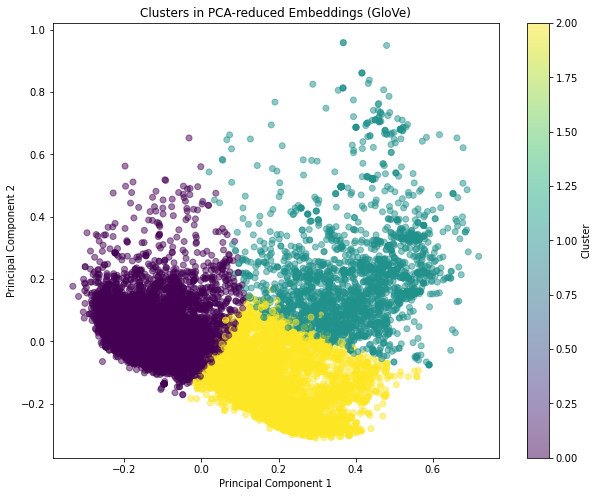

NameError: name 'defaultdict' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Load GloVe embeddings
glove_model = api.load('glove-wiki-gigaword-100')

# Vectorize product descriptions using GloVe embeddings
def get_mean_glove_vector(text):
    words = word_tokenize(text)
    vectors = [glove_model[word] for word in words if word in glove_model]
    return np.mean(vectors, axis=0) if vectors else None

X_glove = df['Product Description'].apply(get_mean_glove_vector)
X_glove = np.vstack(X_glove.dropna())

# Normalize embeddings
normalized_embeddings = X_glove / np.linalg.norm(X_glove, axis=1, keepdims=True)

# Clustering
kmeans_glove = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_glove = kmeans_glove.fit_predict(normalized_embeddings)

# PCA for visualization
pca_glove = PCA(n_components=3)
compressed_embeddings_glove = pca_glove.fit_transform(normalized_embeddings)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(compressed_embeddings_glove[:, 0], compressed_embeddings_glove[:, 1], c=clusters_glove, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Clusters in PCA-reduced Embeddings (GloVe)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Word Clouds
cluster_texts_glove = defaultdict(str)
for text, label in zip(df['Product Description'], clusters_glove):
    cluster_texts_glove[label] += " " + text

plt.figure(figsize=(20, 10))
for i, (label, text) in enumerate(cluster_texts_glove.items(), 1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(1, len(cluster_texts_glove), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label}')
    plt.axis("off")
plt.show()